<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/Model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/staff_encoded.csv .


In [105]:
import pandas as pd
staff = pd.read_csv('staff_encoded.csv', sep=';')

In [106]:
staff.columns

Index(['Unnamed: 0', 'Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs', 'Accident', 'wk_position', 'Age',
       'Severity', 'Accident_place', 'Gender_Hombre', 'T_Turno de mañana',
       'T_Turno de noche', 'T_Turno de tarde', 'Age_Entre 30-50',
       'Age_Mayor 50', 'Age_Menor 30', 'wk_position_encoded',
       'Tipo_trab_reduced', 'Acc_Duración Determinada', 'Acc_ETT',
       'Acc_Indefinido', 'Acc_Otros'],
      dtype='object')

In [107]:
X.head()

,Horas Presencia Efectiva Subcontratados,Horas Presencia Efectiva ETTs,Horas Formacion Seguridad Propios,Horas Formacion Seguridad ETTs,Gender_Hombre,T_Turno de mañana,T_Turno de noche,T_Turno de tarde,Age_Entre 30-50,Age_Mayor 50,Age_Menor 30,wk_position_encoded,Acc_Duración Determinada,Acc_ETT,Acc_Indefinido,Acc_Otros
0,25249.0,42484.0,1419.3,830.1,1,1,0,0,1,0,0,415,0,1,0,0
1,25249.0,42484.0,1419.3,830.1,1,1,0,0,0,1,0,695,0,0,1,0
2,25684.5,18302.3,1150.6,151.5,1,0,0,1,1,0,0,659,1,0,0,0
3,25684.5,18302.3,1150.6,151.5,1,1,0,0,1,0,0,537,0,1,0,0
4,0.0,167848.0,1300.5,101.5,1,1,0,0,1,0,0,320,0,0,0,1


### Linear Regression model

In [108]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


X = staff[['Horas Presencia Efectiva Subcontratados',
       'Horas Presencia Efectiva ETTs', 'Horas Formacion Seguridad Propios',
       'Horas Formacion Seguridad ETTs',
       'Gender_Hombre', 'T_Turno de mañana',
       'T_Turno de noche', 'T_Turno de tarde', 'Age_Entre 30-50',
       'Age_Mayor 50', 'Age_Menor 30', 'wk_position_encoded',
        'Acc_Duración Determinada', 'Acc_ETT',
       'Acc_Indefinido', 'Acc_Otros']]

In [109]:
y = staff['Accident']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
len(X_test)

7000

In [112]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))



Coefficients: 
 [-2.67633360e-06 -1.55970510e-06  6.82094449e-05  1.48323767e-04
  1.49918014e-01  8.82977728e-02 -9.91705566e-02  1.08727839e-02
 -1.72735700e-02  2.28085952e-02 -5.53502523e-03 -9.56767296e-06
 -9.23427080e-02  4.28898092e-02  6.05052243e-02 -1.10523254e-02]
Mean squared error: 0.14
Coefficient of determination: 0.12


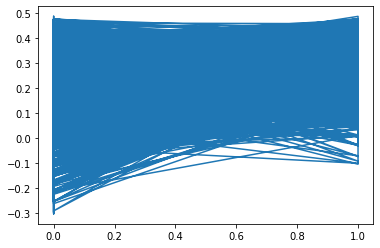

In [113]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred)

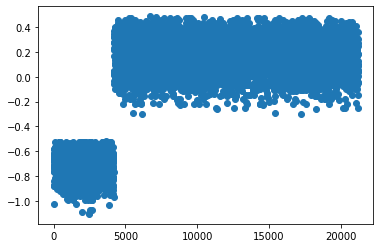

In [114]:
## ploting the difference between the predicted values and the true ones

plt.plot(y_pred - y_test,marker='o',linestyle='')


In [115]:
from sklearn.metrics import confusion_matrix


In [119]:
y_test = np.where(y_test == 0, 'No',y_test)
y_test = np.where(y_test == 1, 'Yes',y_test)
y_pred = np.where(y_pred == 0, 'No',y_pred)
y_pred = np.where(y_pred == 1, 'Yes',y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [121]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color= "black")
    fig.tight_layout()
    return ax